In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [47]:
multi_matrix = np.matmul(random_arr, inv_matrix)

In [48]:
multi_matrix[multi_matrix>0.01]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
postiive_shit_matrix = np.matmul(random_arr, np.transpose())

In [55]:
random_selections = np.reshape(np.random.random(10000),(5000,2))

In [ ]:
import matplotlib.pyplot

(array([[52., 54., 53., 54., 46., 46., 46., 53., 51., 56., 50., 59., 55.,
         46., 51., 51., 51., 53., 55., 55., 48., 42., 45., 54., 56., 56.,
         43., 43., 47., 48., 48., 42., 55., 39., 46., 51., 60., 43., 55.,
         53., 49., 45., 48., 34., 56., 46., 45., 53., 63., 51., 56., 47.,
         49., 54., 48., 59., 46., 53., 54., 47., 51., 56., 52., 43., 58.,
         47., 52., 34., 48., 55., 54., 52., 36., 48., 48., 42., 57., 61.,
         58., 38., 51., 54., 36., 38., 46., 47., 35., 34., 49., 57., 50.,
         51., 47., 57., 62., 51., 63., 63., 47., 58.],
        [47., 32., 42., 53., 49., 60., 54., 59., 54., 37., 47., 45., 52.,
         49., 51., 66., 47., 46., 43., 41., 52., 49., 62., 39., 49., 45.,
         47., 62., 42., 66., 45., 48., 58., 52., 42., 62., 55., 44., 53.,
         44., 65., 56., 42., 56., 62., 43., 54., 46., 47., 54., 64., 41.,
         46., 43., 47., 59., 46., 53., 41., 55., 53., 42., 52., 47., 43.,
         60., 49., 61., 53., 58., 47., 53., 42., 39., 54.

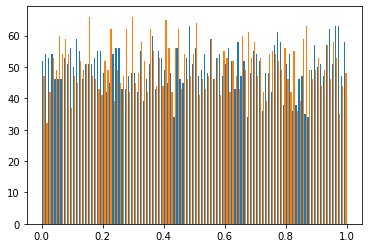

In [60]:
plt.hist(random_selections, bins=100)

In [71]:
num_inside_circle = [1  for tup in random_selections if sum(tup**2)<1]

In [78]:
sum(num_inside_circle)/len(random_selections)*4

3.1536

In [79]:
import random

In [81]:
random.random()

0.1856551861172384

In [93]:
N = 1000
number_of_norm = 10000
normal_array = [(sum([random.random() for _ in range(N)])/N-(0.5))/(np.sqrt(1/12)/np.sqrt(N)) for __ in range(number_of_norm)]

(array([  2.,   1.,   1.,   3.,   0.,   3.,   4.,   3.,   5.,   3.,   9.,
          9.,  11.,  15.,  24.,  21.,  32.,  27.,  43.,  48.,  64.,  70.,
         77.,  92., 116., 116., 143., 139., 156., 203., 239., 224., 226.,
        287., 307., 282., 292., 300., 311., 309., 332., 346., 346., 328.,
        334., 344., 334., 346., 291., 284., 277., 248., 209., 201., 187.,
        201., 156., 122., 142., 133.,  79.,  83.,  81.,  84.,  56.,  42.,
         42.,  31.,  23.,  18.,  23.,   8.,   7.,  13.,   4.,   6.,   6.,
          5.,   2.,   1.,   3.,   3.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-3.63381413, -3.54789944, -3.46198476, -3.37607007, -3.29015539,
        -3.2042407 , -3.11832602, -3.03241133, -2.94649665, -2.86058196,
        -2.77466728, -2.68875259, -2.60283791, -2.51692322, -2.43100854,
        -2.34509385, -2.25917917, -2.17326448, -2.0873498 , -2.00143511,
        -1.91552043, -1.82

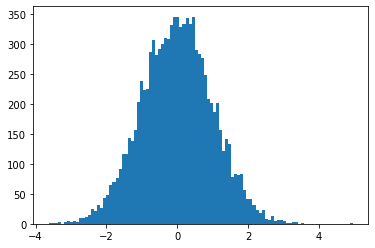

In [95]:
plt.hist(normal_array,bins=100)

In [92]:
np.std(normal_array)

0.9877166556025767

In [97]:
new_normal = np.random.normal(0,1,10000)

## Negative exp dist

In [99]:
import math

In [100]:
def inverse_F(lam, u):
    return (-1/lam)*math.log(1-u)

In [114]:
hazard = 0.8
num_default_ = 10000
default_times = [inverse_F(hazard, random.random()) for _ in range(num_default_)]

In [117]:
np.mean(default_times)

1.2391521000116947

## Bond pricing

### How to price bonds

- Sequence of cashflows. 
- Current price of bond is dicounted cashflows to today. AKA PV or Present Value. 

Lets consider zero coupon bond: only one payment at the end (which is the face value of the bond). 

PV(bond) = discounted cash flows of the bond.
In case of zero-coupon bond,
PV(bond) = discounted Face value of the bond



### Discount

1. Risk free discount: THere is no risk involded. Discount using risk-free interest rate (coming from different sources). COudl be related to treasury bond yield, etc etc. 
2. Risky discount: risk_free_interest_rate + discounting_due_to_chance_of_default.

In [122]:
interest_rate = 0.02 #yearly continuously compuneded
time_year = 1
risk_free_disc = math.exp(-interest_rate*time_year)
bond_face_value = 100

#Monte carlo for bond price
bond_price_mc = risk_free_disc*sum([bond_face_value for def_time in default_times if def_time>1.0])/len(default_times)

In [123]:
bond_price_mc

43.785474736612755

In [124]:
bond_price_anl = risk_free_disc * math.exp(-hazard *time_year) * bond_face_value

In [125]:
bond_price_anl

44.04316545059992

## Montecarlo for Call option


Call option: OPtion to buy the stock for strike price, $K$ at maturity $T$

Pay_off_call_option = $max(S_T-K,0)$  
PV(call_option) = $C(S_t,T)$ ?  
$C(S_t,T) = Discount*Expect(max(S_T-K,0)|S_0)$


### Black Schole's assumption

1. S_t follows a geometrix brownian motion. 
2. Known risk-free interest rate. 
3. No transaction costs. 
4. Known volaitlity. 

In [209]:
interest_rate = 0.02 #yearly continuously compuneded
maturity = 1
risk_free_disc = math.exp(-interest_rate*maturity)
risk_free_interest = 0.02


In [132]:
import pandas as pd
import yfinance as yf

In [137]:
aapl_df = yf.download('AAPL', 
                      start='2019-01-01', 
                      end='2021-06-12', 
                      progress=False,
)

appl_stock_values = list(aapl_df["Close"].values)

In [178]:
vol = np.std(appl_stock_values[-10:])**2
vol = 0.397

#### We are pricing in risk neutral measure. 
- THe drift of the stock is risk-free interest rate r. 

In [179]:
curr_stock_price = appl_stock_values[-1]
strike_price = curr_stock_price*(1.1)
print("current price:", curr_stock_price)
print("strike price:",strike_price)

current price: 127.3499984741211
strike price: 140.08499832153322


## Strategy:

- We are going to use the analytical form of the stock price in risk neutral pricing framework:
- $S_T = S_0\times exp(t\times(r-\sigma^2/2)+\sigma\times W(t))$
- We use monte carlo simulations to simulate different path for $S_T$, find the discounted pay off and average to get the expected price (using law of large numbers).

In [192]:
num_paths = 1000
num_steps = 1000
dt = maturity/num_steps
dt

0.001

In [214]:
stock_price_list = []
for path in range(num_paths):
    S_t = curr_stock_price
    for step in range(num_steps):
        S_t = S_t * math.exp(dt*(risk_free_interest-(vol**2)/2) + vol*math.sqrt(dt)*np.random.normal())
    stock_price_list.append(S_t)

In [210]:
stock_price_list = []
for path in range(num_paths):
    S_t = curr_stock_price
    S_t = S_t * math.exp(maturity*(risk_free_interest-(vol**2)/2) + vol*math.sqrt(maturity)*np.random.normal())
    
#     for step in range(num_steps):
#         S_t = S_t * math.exp(dt*(risk_free_disc-(vol**2)/2) + vol*math.sqrt(dt)*np.random.normal())
    stock_price_list.append(S_t)

In [211]:
pay_off_list = [max(stock_pr-strike_price,0) for stock_pr in stock_price_list]

In [212]:
exp_pay_off = sum(pay_off_list)/len(pay_off_list)

In [213]:
exp_pay_off

16.584315483973537